In [1]:
from nbdev.showdoc import *
import numpy as np
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
from sympy import *
from typing import Tuple
from functools import partial
import diffusion_curvature
from diffusion_curvature.datasets import *
from diffusion_curvature.curves import *
from diffusion_curvature.comparisons import *
from diffusion_curvature.core import plot_3d, diffusion_matrix, gaussian_kernel
# Reload any changes made to external files
%load_ext autoreload
%autoreload 2

In [ ]:
noise_levels = [0,0.2,0.4,0.6]

In [ ]:
# get noisy tori
Tori = {}
Tori_ks_true = {}
for nl in noise_levels:
    X, ks = torus(n=4000,noise=nl)
    Tori[nl] = X
    Tori_ks_true[nl] = ks

In [ ]:
# get noisy ellipsoids
Ellipsoids = {}
Ellipsoids_ks = {}
for nl in noise_levels:
    X, ks = ellipsoid(n=4000, noise = nl)
    Ellipsoids[nl] = X
    Ellipsoids_ks[nl] = ks

In [ ]:
#Compute diffusion curvature
Tori_ks_diffusion = {}
for nl in tqdm(noise_levels):
    Tori_ks_diffusion[nl] = diffusion_curvature_contra_noise(Tori[nl], dimension=2, t=8,k=10)

  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#Compute diffusion curvature
Ellipsoids_ks_diffusion = {}
for nl in tqdm(noise_levels):
    Ellipsoids_ks_diffusion[nl] = diffusion_curvature_contra_noise(Ellipsoids[nl], dimension=2, t=8,k=10)

  0%|          | 0/4 [00:00<?, ?it/s]

# Noise Comparisons

## Of Torus

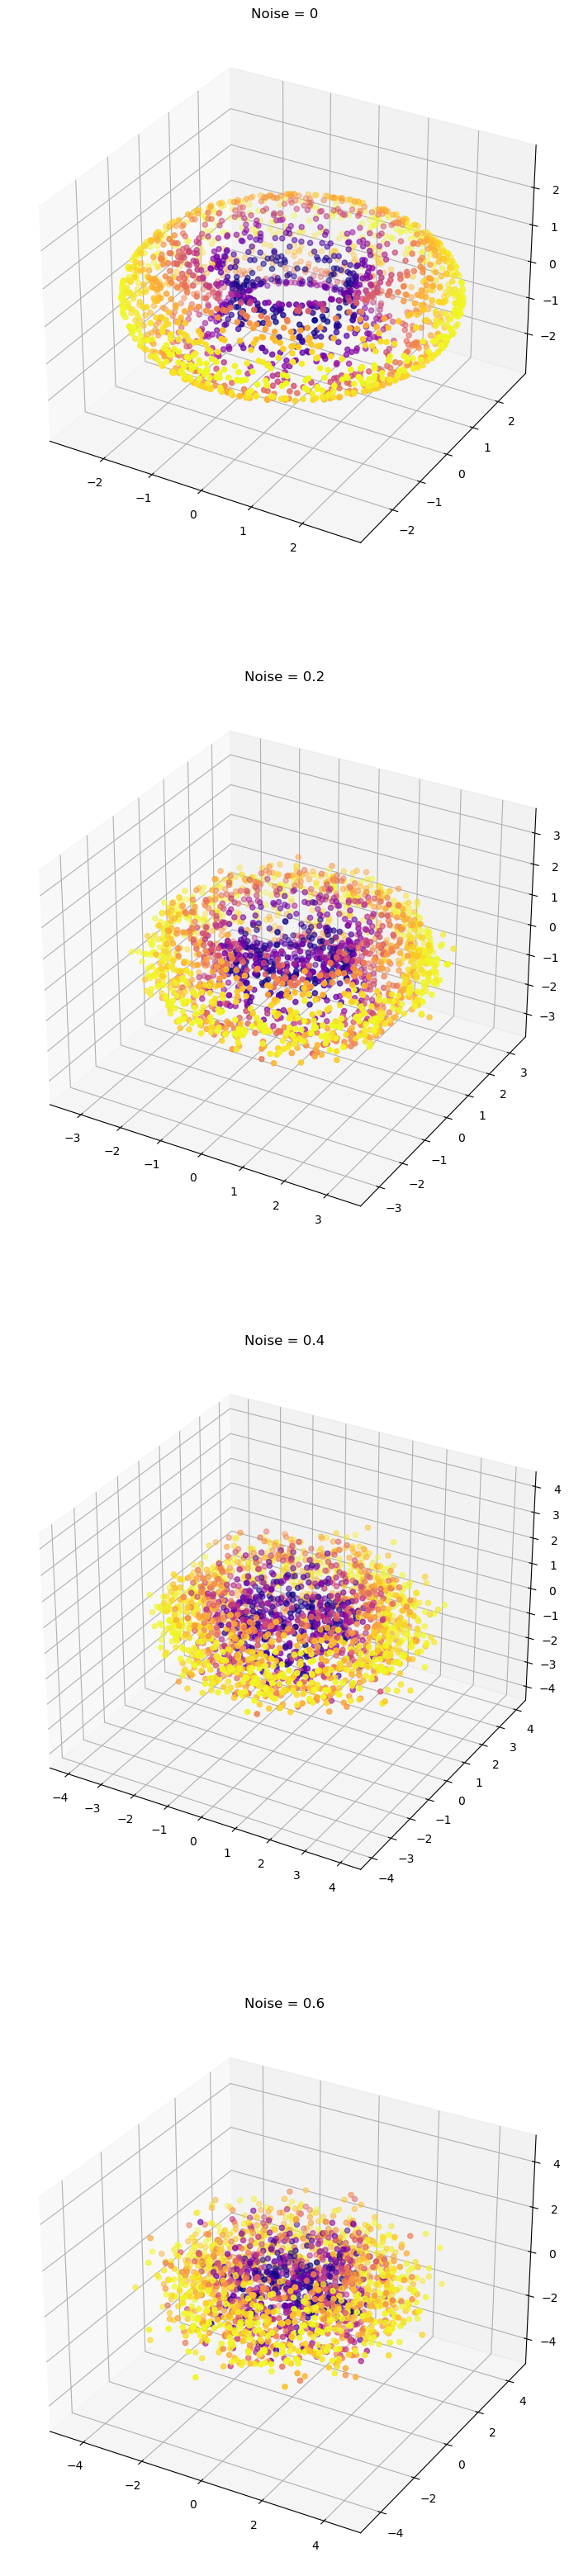

In [ ]:
fig = plt.figure(figsize=(40,40))
for i, nl in enumerate(noise_levels):
    ax = fig.add_subplot(int(f"{len(noise_levels)}1{i+1}"), projection="3d")
    X = Tori[nl]
    ks = Tori_ks_true[nl]
    lim = np.max(np.linalg.norm(X,axis=1))
    ax.axes.set_xlim3d(left=-lim, right=lim)
    ax.axes.set_ylim3d(bottom=-lim, top=lim)
    ax.axes.set_zlim3d(bottom=-lim, top=lim)
    ax.scatter(X[:,0],X[:,1],X[:,2],c=ks,cmap="plasma")
    ax.set_title(f"Noise = {nl}")

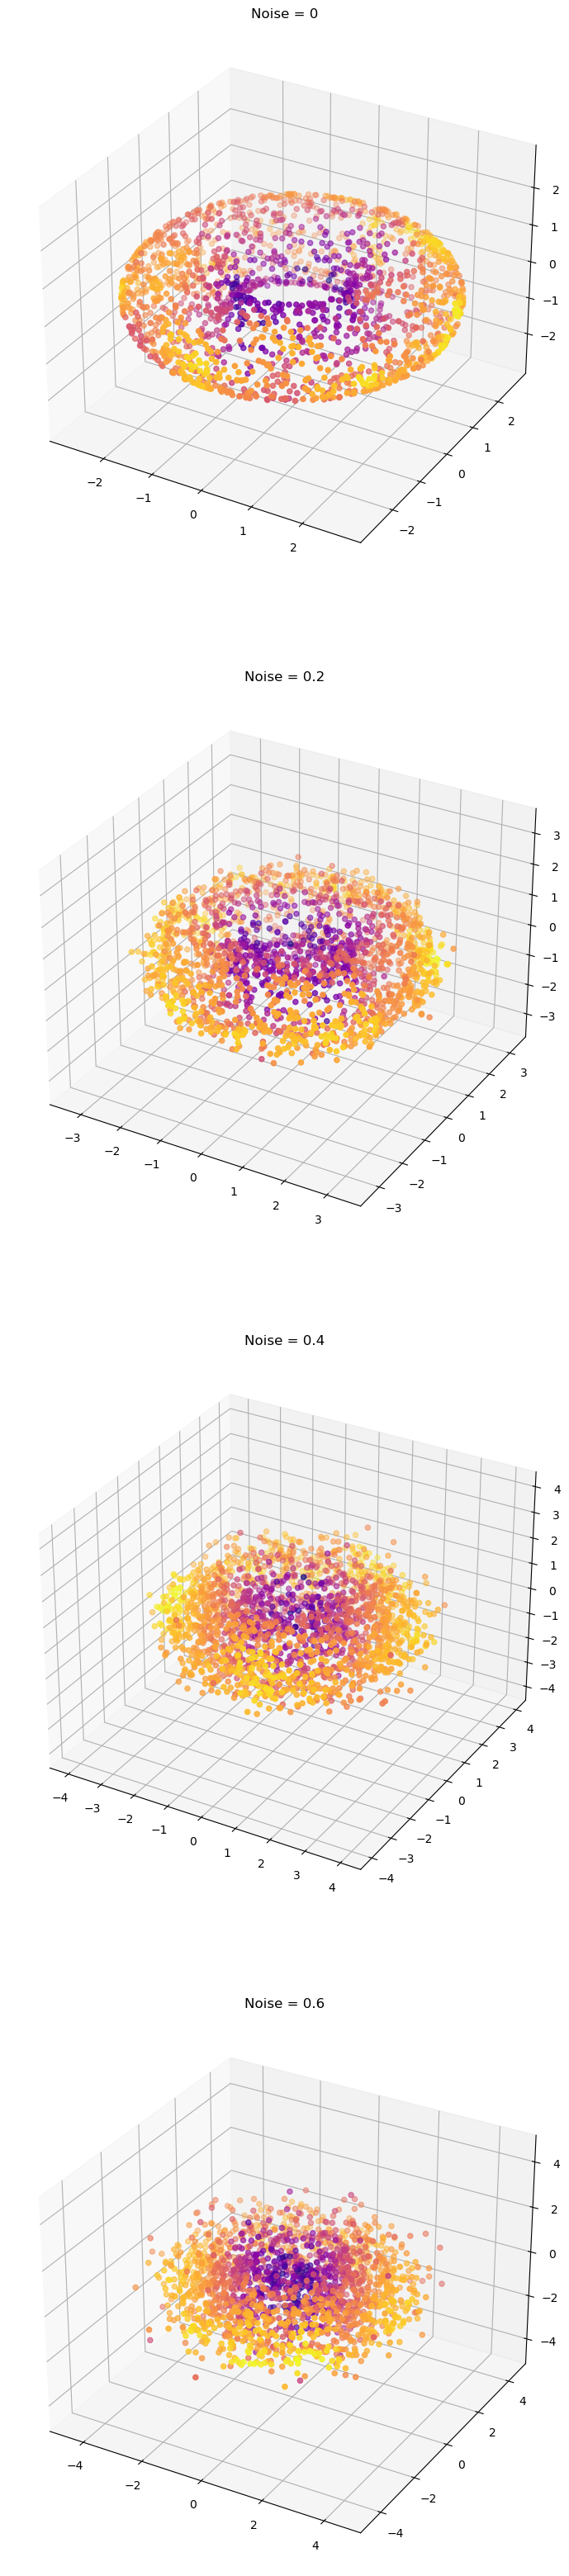

In [ ]:
fig = plt.figure(figsize=(40,40))
for i, nl in enumerate(noise_levels):
    ax = fig.add_subplot(int(f"{len(noise_levels)}1{i+1}"), projection="3d")
    X = Tori[nl]
    ks = Tori_ks_diffusion[nl]
    lim = np.max(np.linalg.norm(X,axis=1))
    ax.axes.set_xlim3d(left=-lim, right=lim)
    ax.axes.set_ylim3d(bottom=-lim, top=lim)
    ax.axes.set_zlim3d(bottom=-lim, top=lim)
    ax.scatter(X[:,0],X[:,1],X[:,2],c=ks,cmap="plasma")
    ax.set_title(f"Noise = {nl}")

## Of Ellipsoid

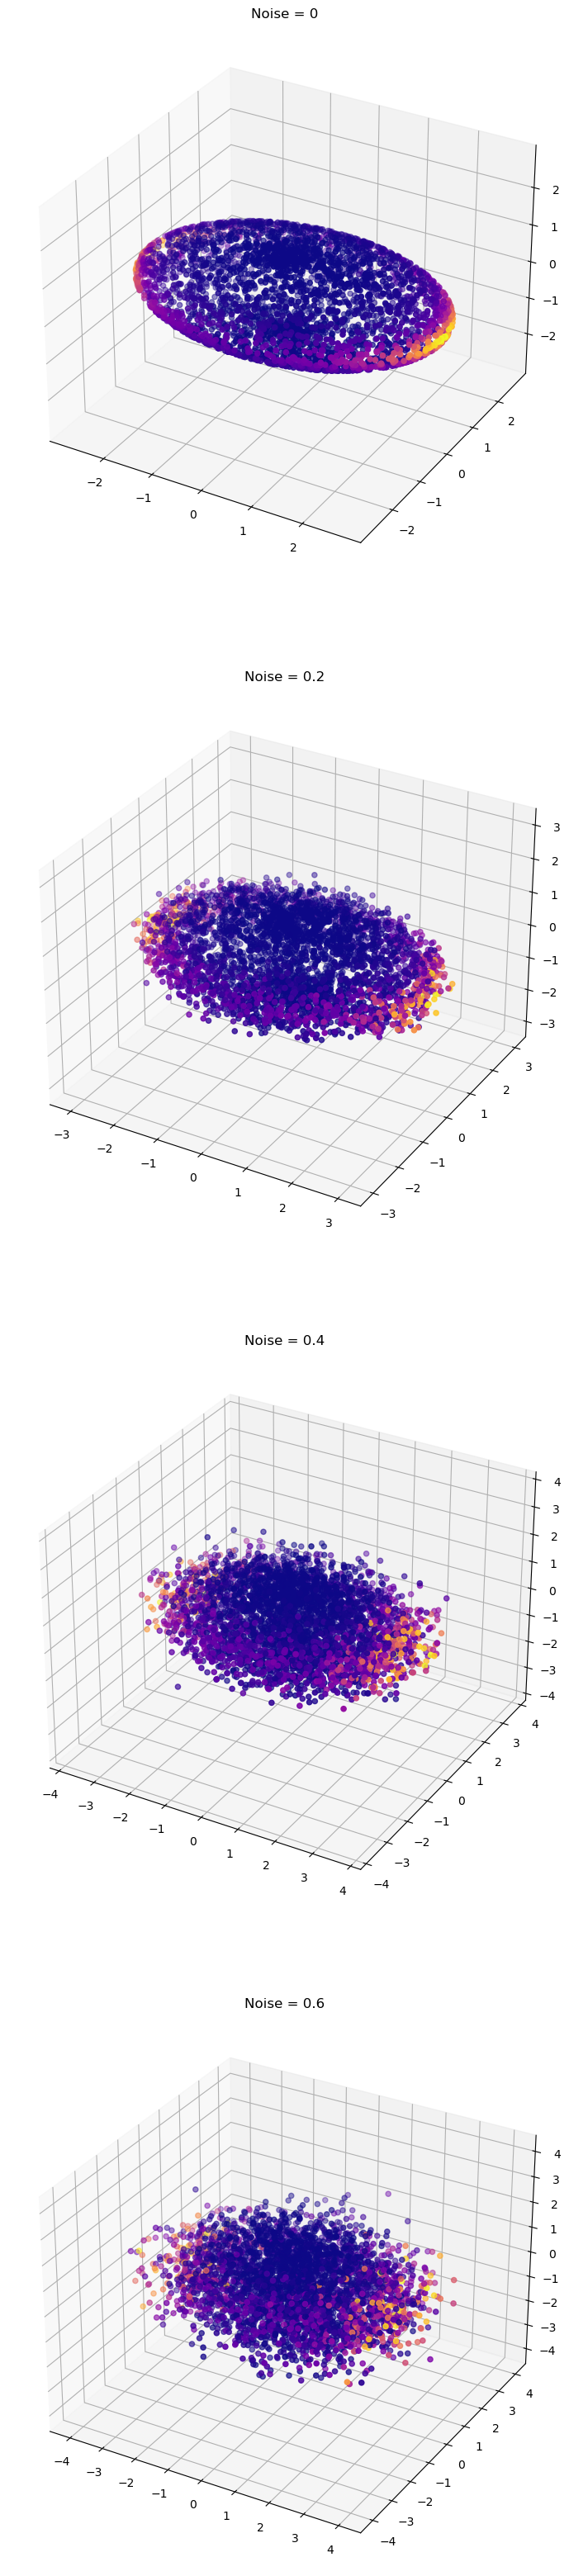

In [ ]:
fig = plt.figure(figsize=(40,40))
for i, nl in enumerate(noise_levels):
    ax = fig.add_subplot(int(f"{len(noise_levels)}1{i+1}"), projection="3d")
    X = Ellipsoids[nl]
    ks = Ellipsoids_ks[nl]
    lim = np.max(np.linalg.norm(X,axis=1))
    ax.axes.set_xlim3d(left=-lim, right=lim)
    ax.axes.set_ylim3d(bottom=-lim, top=lim)
    ax.axes.set_zlim3d(bottom=-lim, top=lim)
    ax.scatter(X[:,0],X[:,1],X[:,2],c=ks,cmap="plasma")
    ax.set_title(f"Noise = {nl}")

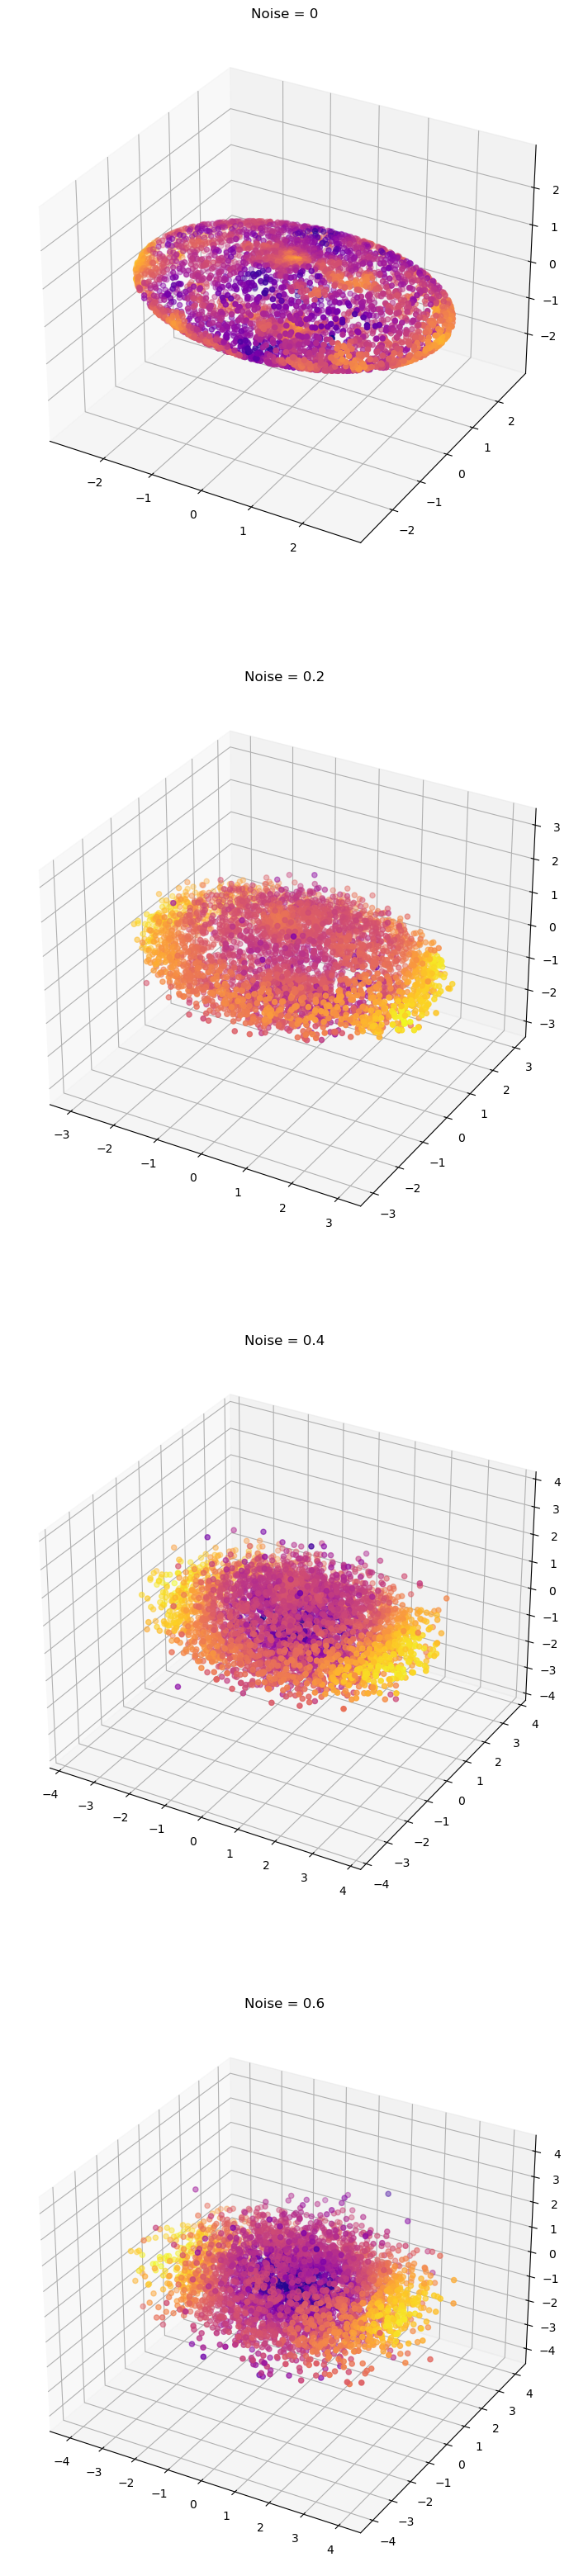

In [ ]:
fig = plt.figure(figsize=(40,40))
for i, nl in enumerate(noise_levels):
    ax = fig.add_subplot(int(f"{len(noise_levels)}1{i+1}"), projection="3d")
    X = Ellipsoids[nl]
    ks = Ellipsoids_ks_diffusion[nl]
    lim = np.max(np.linalg.norm(X,axis=1))
    ax.axes.set_xlim3d(left=-lim, right=lim)
    ax.axes.set_ylim3d(bottom=-lim, top=lim)
    ax.axes.set_zlim3d(bottom=-lim, top=lim)
    ax.scatter(X[:,0],X[:,1],X[:,2],c=ks,cmap="plasma")
    ax.set_title(f"Noise = {nl}")

# Running Entropic Diffusion Curvature on a bunch of datasets

In [6]:
X, ks = ellipsoid(n=4000, noise = 0)
ks_edc = diffusion_curvature_contra_noise(X,dimension=2,k=8,t=15, )

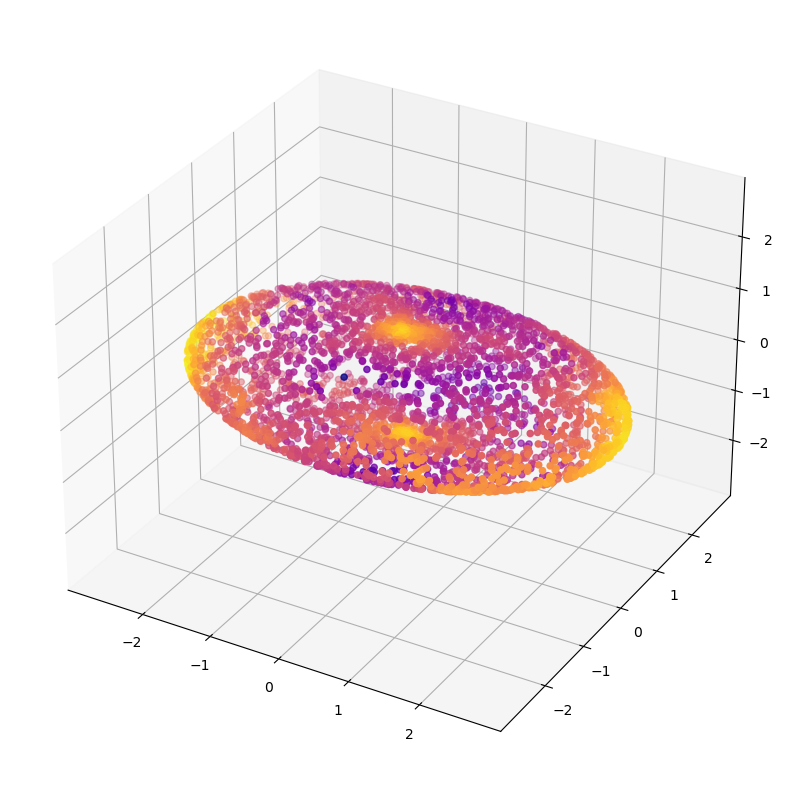

In [7]:
plot_3d(X,ks_edc)

In [16]:
import FRED
from FRED.datasets import directed_sinh_branch, directed_swiss_roll_delayed, directed_swiss_roll

In [5]:
X, _, _ = directed_sinh_branch(sigma=0.2)

In [7]:
ks_edc = diffusion_curvature_contra_noise(X,dimension=2,t=8)

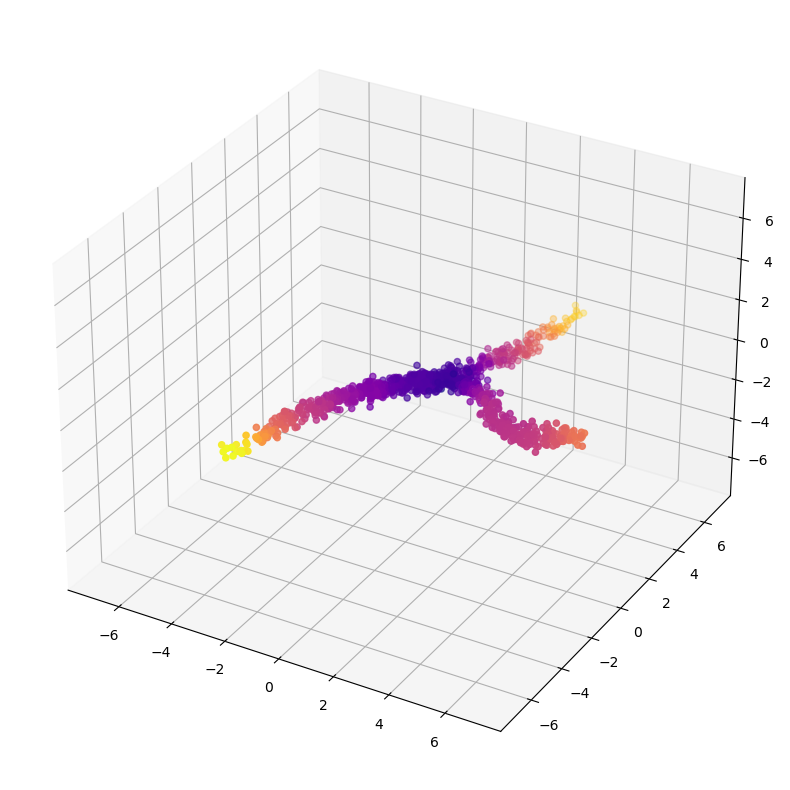

In [8]:
plot_3d(X,ks_edc)

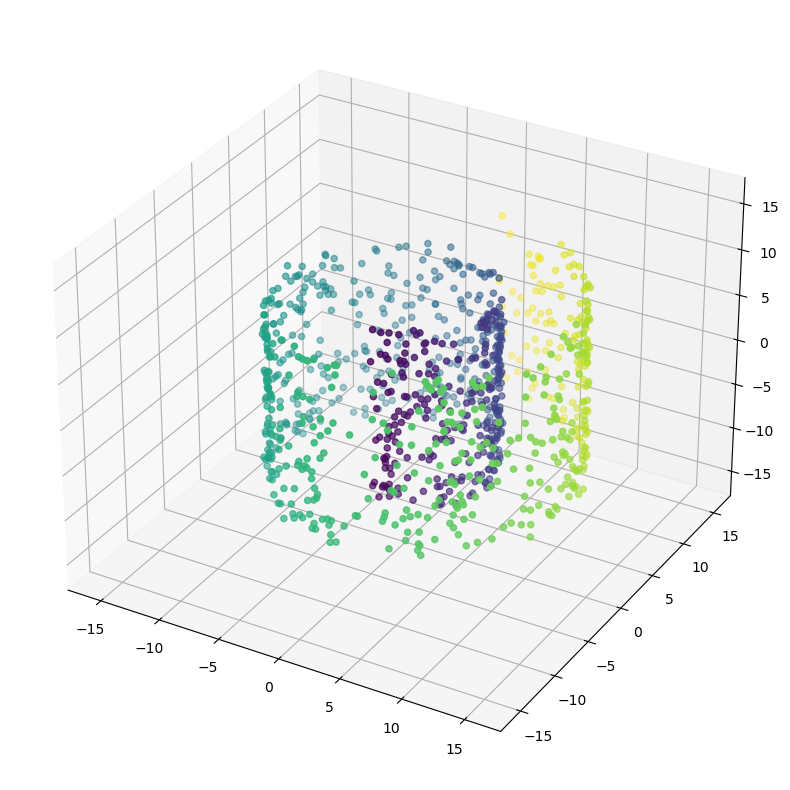

In [22]:
X, flow, labels = directed_swiss_roll_delayed(sigma=0.1)
plot_3d(X,labels, cmap="viridis")

# Results on Single Cell Data

## Datasets from scvelo

In [24]:
from FRED.datasets import rnavelo_pcs
import scvelo as scv
adata = scv.datasets.pancreas()
X, flow, labels, n_pcs = rnavelo_pcs(adata)
# dynamical recovery
scv.tl.recover_dynamics(adata, n_jobs=9)
scv.tl.latent_time(adata)
latent_time = adata.obs['latent_time'].to_numpy()

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:07) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/10 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:19) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)
recovering dynamics (using 9/10 cores)


  0%|          | 0/2290 [00:00<?, ?gene/s]

    finished (0:01:33) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing terminal states
    identified 2 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:02) --> added 
    'latent_time', shared time (adata.obs)


In [26]:
X.shape

torch.Size([3696, 50])

In [27]:
import skdim
# dimension estimate
danco = skdim.id.DANCo().fit(X)
danco.dimension_

11.174409090802436

In [46]:
ks_edc = diffusion_curvature_contra_noise(X.numpy(), dimension=11, t=19,k=15)

In [48]:
import phate
phate_op = phate.PHATE(knn=15,decay=10)
X_phate = phate_op.fit_transform(X)

Calculating PHATE...
  Running PHATE on 3696 observations and 50 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.32 seconds.
    Calculating affinities...
    Calculated affinities in 0.51 seconds.
  Calculated graph and diffusion operator in 0.84 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.47 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.19 seconds.
  Calculated landmark operator in 2.07 seconds.
  Calculating optimal t...
    Automatically selected t = 21
  Calculated optimal t in 3.73 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.41 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.07 seconds.
Calculated PHATE in 9.12 seconds.


<AxesSubplot: title={'center': 'Diffusion Curvature of Pancreas Dataset'}>

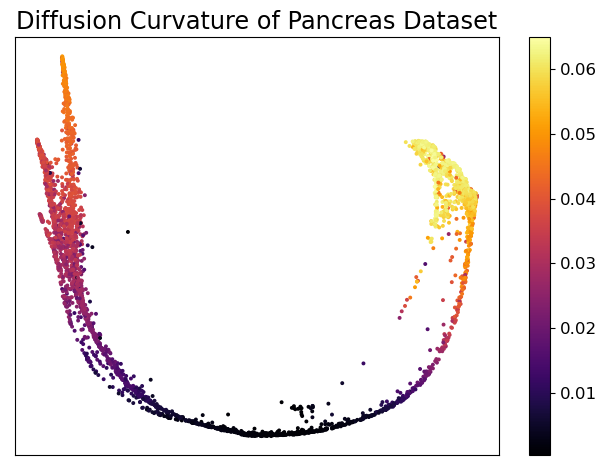

In [49]:
phate.plot.scatter2d(X_phate,c=ks_edc,xticks = False, yticks = False, title="Diffusion Curvature of Pancreas Dataset")

In [51]:
import umap
umap_op = umap.UMAP()
X_umap = umap_op.fit_transform(X)

<AxesSubplot: title={'center': 'Diffusion Curvature of Pancreas Dataset'}>

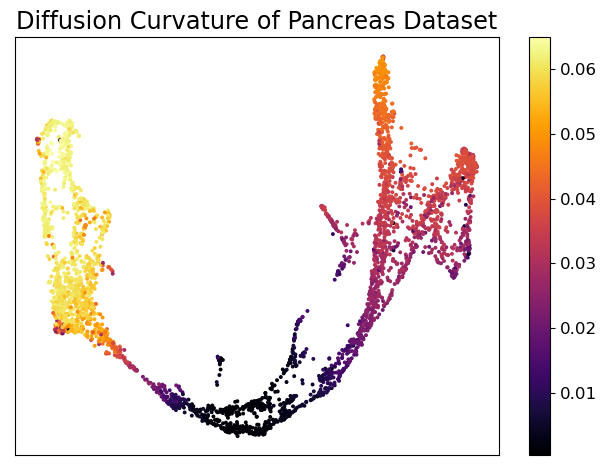

In [52]:
phate.plot.scatter2d(X_umap,c=ks_edc,xticks = False, yticks = False, title="Diffusion Curvature of Pancreas Dataset")

## iPSC dataset

In [2]:
import pickle
# with open("/Users/adjourner/data/iPSC Diffusion Curvature/ipsc_sP.pickle", 'rb') as f:
#     P_iPSC_sparse = pickle.load(f)
with open("/Users/adjourner/data/iPSC Diffusion Curvature/ipsc_P_landmarks.pickle", 'rb') as f:
    P_iPSC_landmarks = pickle.load(f)
with open("/Users/adjourner/data/iPSC Diffusion Curvature/ipsc_transitions.pickle", 'rb') as f:
    P_iPSC_transitions = pickle.load(f)

In [3]:
P_iPSC_landmarks.shape

(500, 500)

In [11]:
type(P_iPSC_landmarks)

numpy.ndarray

In [4]:
P_iPSC_transitions.shape

(220450, 500)

In [12]:
type(P_iPSC_transitions)

scipy.sparse._arrays.bsr_array

In [5]:
import math
def matrix_power(M, t):
    """Simple matrix powering for multiples of 2"""
    Mt = M.copy()
    for i in range(1,int(math.log(t,2))):
        Mt = Mt @ Mt
    return Mt

In [6]:
powered_landmarks = matrix_power(P_iPSC_landmarks,8)

In [7]:
big_honking_P = P_iPSC_transitions @ powered_landmarks

In [13]:
# this comes out at as np.array. We must convert it again to scipy sparse.
from scipy.sparse import bsr_array
big_honking_P_sparse = bsr_array(big_honking_P)

In [14]:
P_iPSC_powered_sparse = big_honking_P_sparse @ P_iPSC_landmarks.T

In [16]:
from scipy.stats import entropy
import numpy as np
entropies = np.array([entropy(x) for x in P_iPSC_powered_sparse])

### Dimension Estimation

In [20]:
X = np.loadtxt('/Users/adjourner/data/iPSC Diffusion Curvature/ipsc.txt')

In [23]:
X_subset = X[:10000]

In [24]:
import skdim
# dimension estimate
danco = skdim.id.DANCo().fit(X_subset)
danco.dimension_

11.93531867839062

In [25]:
from diffusion_curvature.comparisons import diffusion_entropy_of_noise
entropies_noise = diffusion_entropy_of_noise(dimension=int(danco.dimension_),t=8, n_flat_samples=10000)

In [26]:
ks_iPSC = entropies - entropies_noise

In [43]:
import phate
phate_op = phate.PHATE(knn=10, decay=10, t=20)
transformed = phate_op.fit_transform(X_subset)

Calculating PHATE...
  Running PHATE on 10000 observations and 33 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 1.86 seconds.
    Calculating affinities...
    Calculated affinities in 3.84 seconds.
  Calculated graph and diffusion operator in 5.78 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 2.33 seconds.
    Calculating KMeans...
    Calculated KMeans in 2.32 seconds.
  Calculated landmark operator in 5.76 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.45 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.25 seconds.
Calculated PHATE in 14.26 seconds.


<AxesSubplot: title={'center': 'Diffusion Curvature of iPSC Data'}>

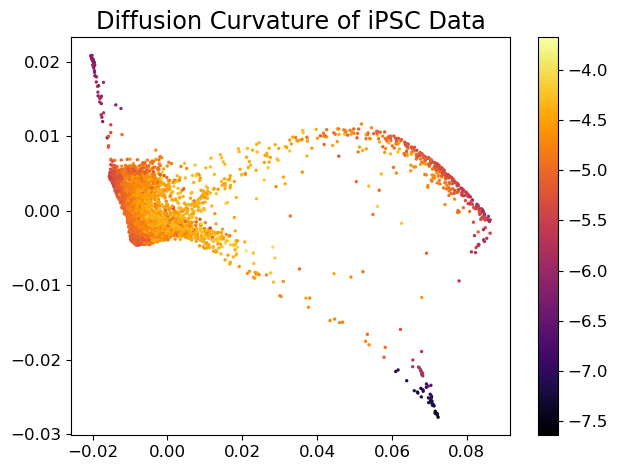

In [44]:
phate.plot.scatter2d(transformed, c=ks_iPSC[:10000], title="Diffusion Curvature of iPSC Data")